<h3>Import the Libraries 

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()

/Users/ritik/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ritik/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ritik/anaconda3/envs/tensorflow_cpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ritik/anaconda3

1.14.0


In [4]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

<h3>Import the Fashion MNIST Dataset

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0820 13:08:33.075026 4426499520 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

<h3>Explore the Data

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


<h3>Pre-Process the Data

In [8]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

<h4>Explore the pre-processed data

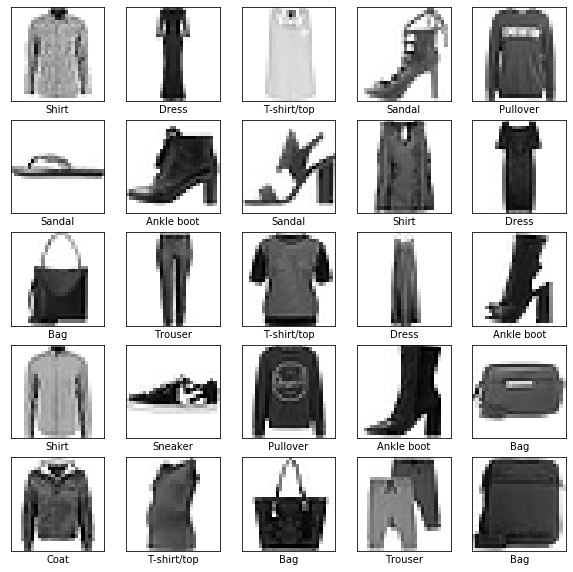

In [9]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

<h3>Build the model

<h4>Set up the Layers

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

<h4>Compile the model

In [11]:
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

<h3>Train the model

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs = 10, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.4081 - acc: 0.8516
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2599 - acc: 0.9063
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2170 - acc: 0.9211
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1863 - acc: 0.9318
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1589 - acc: 0.9414
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1373 - acc: 0.9492
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1172 - acc: 0.9561
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1003 - acc: 0.9628
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0842 - acc: 0.9685
Epoch 10/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0742 - acc: 0.9727


<h3>Evaluate Accuracy

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print('Accuracy on test dataset : {:.3f}'.format(test_accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 0.2893 - acc: 0.9199
Accuracy on test dataset : 0.920
